In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset

In [2]:

df = pd.read_csv("../raw_data/preprocessed_chicago.csv")
df.head()

,WARD,TIME ENCODED,MONTH_SIN,MONTH_COS,WEEKEND,DATE OF OCCURRENCE,OFFENSES,LATITUDE,LONGITUDE
0,35,6,5.000000e-01,8.660254e-01,0,2024-01-16 01:00:00,THEFT OVER $500,41.931844,-87.722951
1,42,4,-2.449294e-16,1.000000e+00,1,2023-12-31 16:30:00,BATTERY,41.888994,-87.626935
2,16,3,5.000000e-01,8.660254e-01,1,2024-01-06 12:50:00,DECEPTIVE PRACTICE,41.793299,-87.664566
3,1,3,8.660254e-01,-5.000000e-01,1,2024-04-07 13:56:00,THEFT OVER $500,41.906797,-87.671862
4,49,4,1.000000e+00,6.123234e-17,0,2024-03-22 15:30:00,THEFT UNDER $500,42.007825,-87.670842


### Step 1: Exploratory Analysis on OFFENSES


In [3]:
# Check the distribution of target classes
offense_counts = df['OFFENSES'].value_counts()
offense_counts

OFFENSES
BATTERY                45766
THEFT OVER $500        31671
CRIMINAL DAMAGE        28638
THEFT UNDER $500       28400
ASSAULT                23508
MOTOR VEHICLE THEFT    22331
OTHER OFFENSE          16773
DECEPTIVE PRACTICE     15059
Name: count, dtype: int64

### Plot the distribution

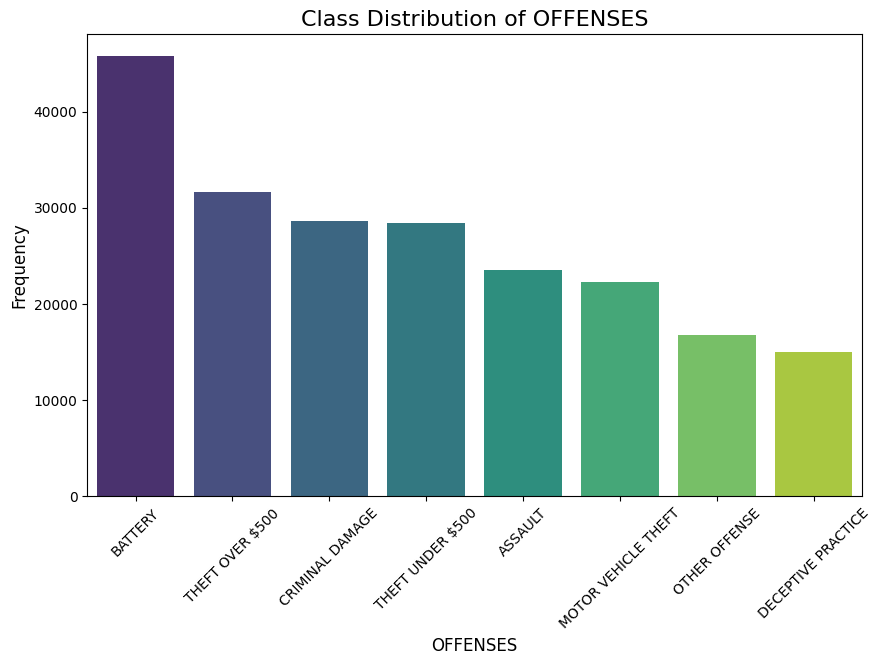

In [4]:
plt.figure(figsize=(10, 6))
sns.barplot(x=offense_counts.index, y=offense_counts.values, hue=offense_counts.index, palette="viridis", legend=False)
plt.title("Class Distribution of OFFENSES", fontsize=16)
plt.xlabel("OFFENSES", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [5]:
print(df.dtypes)

WARD                    int64
TIME ENCODED            int64
MONTH_SIN             float64
MONTH_COS             float64
WEEKEND                 int64
DATE OF OCCURRENCE     object
OFFENSES               object
LATITUDE              float64
LONGITUDE             float64
dtype: object


In [6]:
df = df.drop(columns=['DATE OF OCCURRENCE'])

### Step 2: Preprocessing the Data

In [7]:
# Encode the target variable (OFFENSES)
label_encoder = LabelEncoder()
df['OFFENSES_ENCODED'] = label_encoder.fit_transform(df['OFFENSES'])

# Define features and target
features = df.drop(columns=['OFFENSES', 'OFFENSES_ENCODED'])
target = df['OFFENSES_ENCODED']

# Scale the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.3, random_state=42, stratify=target)

### Step 3: Train a sample KNN model

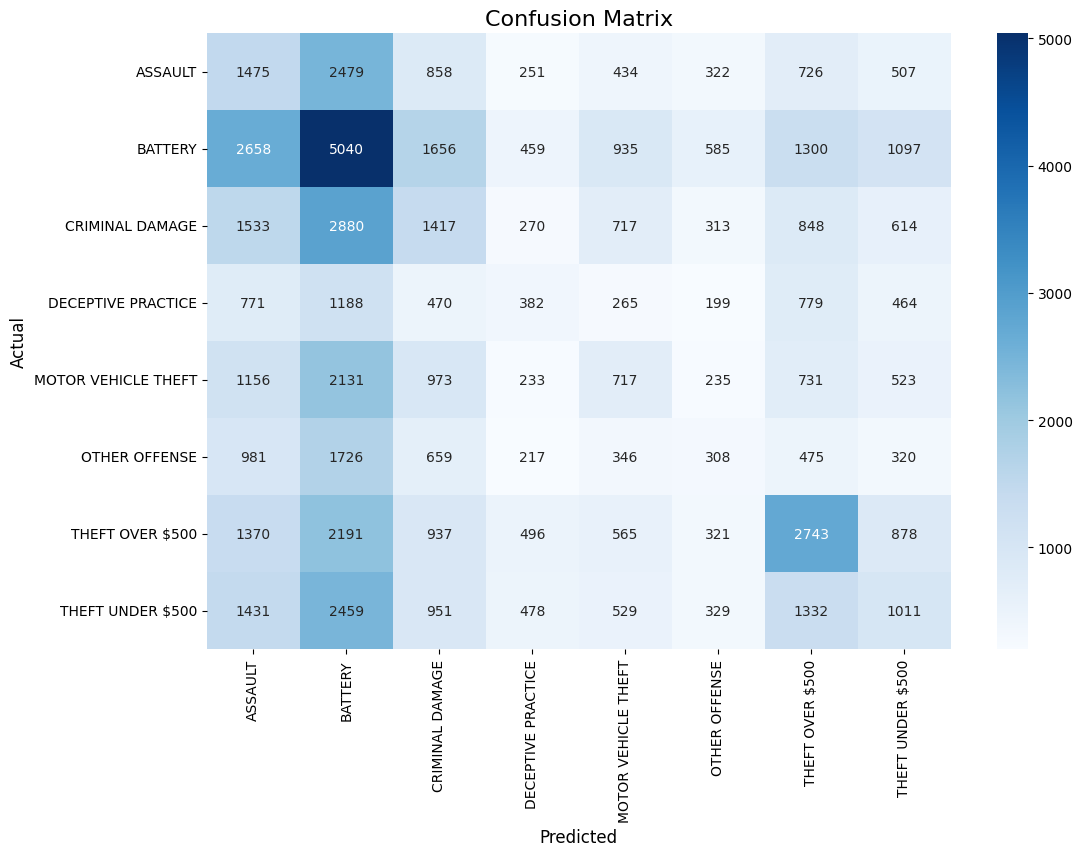

                     precision    recall  f1-score   support

            ASSAULT       0.13      0.21      0.16      7052
            BATTERY       0.25      0.37      0.30     13730
    CRIMINAL DAMAGE       0.18      0.16      0.17      8592
 DECEPTIVE PRACTICE       0.14      0.08      0.10      4518
MOTOR VEHICLE THEFT       0.16      0.11      0.13      6699
      OTHER OFFENSE       0.12      0.06      0.08      5032
    THEFT OVER $500       0.31      0.29      0.30      9501
   THEFT UNDER $500       0.19      0.12      0.15      8520

           accuracy                           0.21     63644
          macro avg       0.18      0.18      0.17     63644
       weighted avg       0.20      0.21      0.20     63644



In [8]:
knn = KNeighborsClassifier(n_neighbors=5)  # Using k=5 as default
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

# Display the confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix", fontsize=16)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()

# Print classification report
print(report)


### Result Observations:
### Overall Accuracy: The model achieves 21% accuracy, which is quite low. This suggests that the model is not performing very well at distinguishing between the different types of offenses.
### Class-wise Performance:
### Some classes like BATTERY and THEFT OVER $500 have relatively better performance (precision, recall, and F1-score), though still modest.
### Other classes such as DECEPTIVE PRACTICE and OTHER OFFENSE show very poor performance, with low precision, recall, and F1-scores.

## Key Changes Made in the Next Run:
## Hyperparameter Tuning:
## GridSearchCV is used to try different values for n_neighbors and metric to find the best combination for the KNN classifier.

## Handling Class Imbalance:
## SMOTE is applied to the training data to balance the class distribution by generating synthetic samples for the minority classes.

## Model Training:
## After resampling the data, train the best KNN model obtained from the grid search.

## Evaluation:
## Evaluate the KNN model by generating a confusion matrix and classification report to understand its performance in predicting the different offense categories.

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 10}
Best Cross-validation Score for KNN: 0.21098033158085006


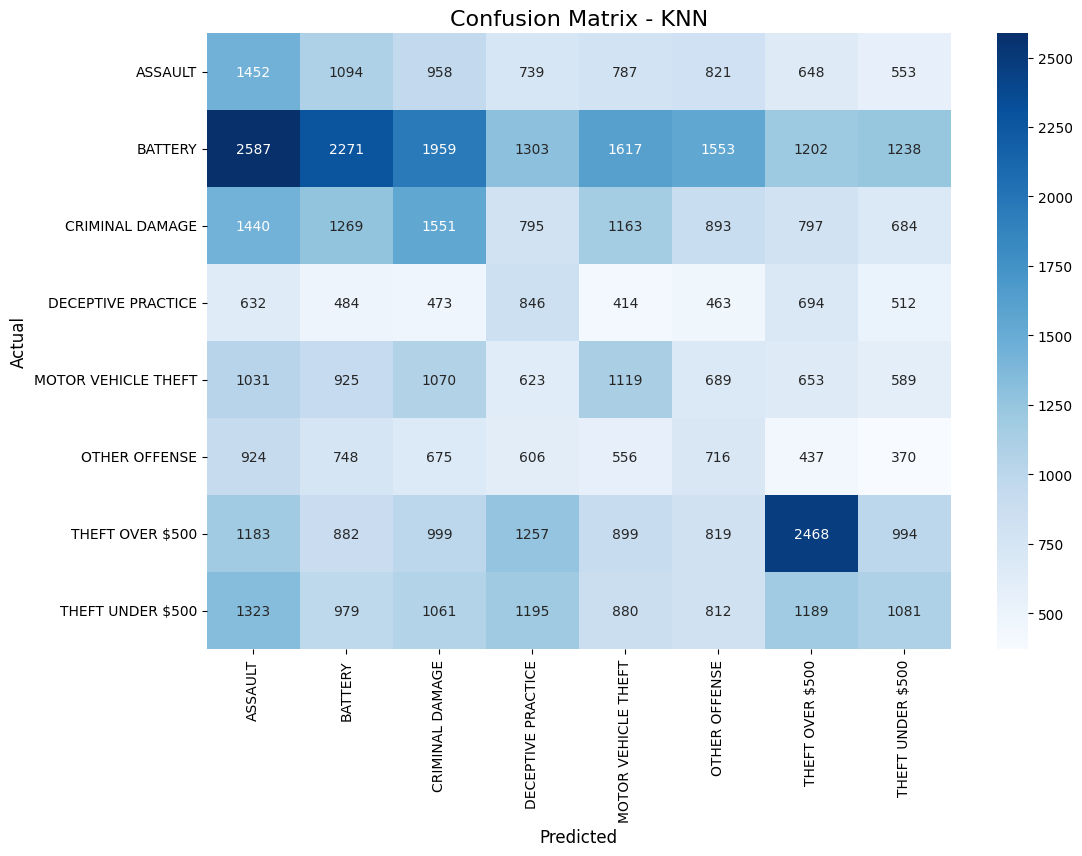

KNN Classification Report:
                     precision    recall  f1-score   support

            ASSAULT       0.14      0.21      0.16      7052
            BATTERY       0.26      0.17      0.20     13730
    CRIMINAL DAMAGE       0.18      0.18      0.18      8592
 DECEPTIVE PRACTICE       0.11      0.19      0.14      4518
MOTOR VEHICLE THEFT       0.15      0.17      0.16      6699
      OTHER OFFENSE       0.11      0.14      0.12      5032
    THEFT OVER $500       0.31      0.26      0.28      9501
   THEFT UNDER $500       0.18      0.13      0.15      8520

           accuracy                           0.18     63644
          macro avg       0.18      0.18      0.17     63644
       weighted avg       0.20      0.18      0.18     63644



In [9]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV

# Load the dataset
data = pd.read_csv("../raw_data/preprocessed_chicago.csv")

# Drop unnecessary columns (like 'DATE OF OCCURRENCE')
data = data.drop(columns=['DATE OF OCCURRENCE'])

# Encode the target variable (OFFENSES)
label_encoder = LabelEncoder()
data['OFFENSES_ENCODED'] = label_encoder.fit_transform(data['OFFENSES'])

# Define features and target
features = data.drop(columns=['OFFENSES', 'OFFENSES_ENCODED'])
target = data['OFFENSES_ENCODED']

# Scale the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.3, random_state=42, stratify=target)

# Hyperparameter Tuning for KNN
# Define KNN and parameter grid for tuning
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 7, 10],  # Try different values of k
    'metric': ['euclidean', 'manhattan']  # Try different distance metrics
}

# Use GridSearchCV to find the best parameters
grid_search_knn = GridSearchCV(knn, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search_knn.fit(X_train, y_train)

# Get the best parameters and the best score
print(f"Best Parameters for KNN: {grid_search_knn.best_params_}")
print(f"Best Cross-validation Score for KNN: {grid_search_knn.best_score_}")

# Train the best KNN model
best_knn = grid_search_knn.best_estimator_

# Step 2: Handle Class Imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 3: Train KNN model with resampled data
best_knn.fit(X_train_resampled, y_train_resampled)

# Step 4: Evaluate KNN Model
y_pred_knn = best_knn.predict(X_test)

# Confusion matrix and classification report for KNN
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn, target_names=label_encoder.classes_)

# Display the confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix - KNN", fontsize=16)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()

# Print classification report for KNN
print("KNN Classification Report:")
print(report_knn)

### Result Observations:

### Best Parameters:

### The best parameters found for KNN are: 

### metric: 'manhattan': This means the model used the Manhattan distance for calculating the nearest neighbors.
### n_neighbors: 10: The model used 10 neighbors for predictions.

### Model Performance:

### The accuracy of the model is 18%, which is quite low and indicates that the model struggles to correctly classify the different offenses.
### The precision, recall, and F1-scores are generally low across most classes, with DECEPTIVE PRACTICE and OTHER OFFENSE performing particularly poorly.
### THEFT OVER $500 has the highest performance with a precision of 0.31 and recall of 0.26, but this is still far from ideal.

## Key Changes Made in the Next Run:
## Expanded the Range of n_neighbors:
## Now testing values of n_neighbors from 3 to 20 to find the optimal k value.

## Added More Distance Metrics:
## Testing three different distance metrics: Euclidean, Manhattan, and Minkowski. This will help determine which metric yields better performance for KNN on this dataset.

## Weights Parameter:
## The weights parameter is tested with two options: 'uniform' (each neighbor has equal weight) and 'distance' (closer neighbors have more influence). This helps KNN give more importance to closer neighbors.

## Class Weights Adjustment:
## Although this isn't explicitly used in the grid search, experiment with the class_weight='balanced' argument in the KNN model if the class imbalance is very pronounced. This would adjust the weight of each class inversely proportional to its frequency.

## Algorithm Option:
## Testing different KNN algorithms ('auto', 'ball_tree', 'kd_tree', and 'brute') to check which one works best for your dataset.

In [10]:
#       # Load the dataset
#       data = pd.read_csv("../raw_data/preprocessed_chicago.csv")
#
#       # Drop unnecessary columns (like 'DATE OF OCCURRENCE')
#       data = data.drop(columns=['DATE OF OCCURRENCE'])
#
#       # Encode the target variable (OFFENSES)
#       label_encoder = LabelEncoder()
#       data['OFFENSES_ENCODED'] = label_encoder.fit_transform(data['OFFENSES'])
#
#       # Define features and target
#       features = data.drop(columns=['OFFENSES', 'OFFENSES_ENCODED'])
#       target = data['OFFENSES_ENCODED']
#
#       # Scale the features
#       scaler = StandardScaler()
#       features_scaled = scaler.fit_transform(features)
#
#       # Split data into training and testing sets
#       X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.3, random_state=42, stratify=target)
#
#       # Step 1: Hyperparameter Tuning for KNN with Expanded Grid
#       # Define KNN and parameter grid for tuning
#       knn = KNeighborsClassifier()
#       param_grid = {
#           'n_neighbors': range(3, 21),  # Try a wider range of k (3 to 20)
#           'metric': ['euclidean', 'manhattan', 'minkowski'],  # Try different distance metrics
#           'weights': ['uniform', 'distance'],  # Test both uniform and distance-based weights
#           'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']  # Test different algorithms
#       }
#
#       # Use GridSearchCV to find the best parameters
#       grid_search_knn = GridSearchCV(knn, param_grid, cv=5, n_jobs=-1, verbose=1)
#       grid_search_knn.fit(X_train, y_train)
#
#       # Get the best parameters and the best score
#       print(f"Best Parameters for KNN: {grid_search_knn.best_params_}")
#       print(f"Best Cross-validation Score for KNN: {grid_search_knn.best_score_}")
#
#       # Train the best KNN model
#       best_knn = grid_search_knn.best_estimator_
#
#       # Step 2: Handle Class Imbalance with SMOTE
#       smote = SMOTE(random_state=42)
#       X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
#
#       # Step 3: Train KNN model with resampled data
#       best_knn.fit(X_train_resampled, y_train_resampled)
#
#       # Step 4: Evaluate KNN Model
#       y_pred_knn = best_knn.predict(X_test)
#
#       # Confusion matrix and classification report for KNN
#       conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
#       report_knn = classification_report(y_test, y_pred_knn, target_names=label_encoder.classes_)
#
#       # Display the confusion matrix
#       plt.figure(figsize=(12, 8))
#       sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
#       plt.title("Confusion Matrix - Improved KNN", fontsize=16)
#       plt.xlabel("Predicted", fontsize=12)
#       plt.ylabel("Actual", fontsize=12)
#       plt.show()
#
#       # Print classification report for KNN
#       print("Improved KNN Classification Report:")
#       print(report_knn)


### Result Observations:

### Best Parameters:
### 
### n_neighbors: 20
### metric: 'euclidean'
### weights: 'distance'
### algorithm: 'auto' (this means the model automatically selects the best algorithm for computing nearest neighbors).
### Best Cross-validation Score:
### 
### The best cross-validation score achieved was 0.2209, which is an improvement over the previous cross-validation score.
### KNN Model Evaluation:
### 
### The accuracy of the model is 20%, which still indicates that the model is struggling to effectively classify the different offenses.
### Precision, recall, and F1-scores for different classes have improved slightly, but most values are still relatively low. Specifically:
### THEFT OVER $500 is the best-performing class with a precision of 0.32 and recall of 0.32.
### DECEPTIVE PRACTICE and OTHER OFFENSE still perform poorly with precision values of 0.12 and recall values of 0.18 and 0.17, respectively.

## Key Changes Made in the Next Run:
## 1. Handling Class Imbalance with class_weight='balanced':
## Class balancing can be done in KNN by assigning weights to classes inversely proportional to their frequency. This can be done by setting class_weight='balanced' in the KNN model.
## 2. SMOTE (Synthetic Minority Over-sampling Technique):
## We'll continue using SMOTE but will experiment with adjusting the oversampling ratio or use NearMiss if necessary.
## 3. Feature Engineering:
## If possible, we can create new features based on existing ones. In this case, we might not be able to easily add new features without ## domain knowledge, but feature scaling (which we already applied) and feature selection techniques like Recursive Feature Elimination ## (RFE) might help.

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/home/suman/.pyenv/versions/risky_predictive_policing/lib/python3.10/site-packages/numpy/ma/core.py:2892: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}
Best Cross-validation Score for KNN: 0.4226656980275026


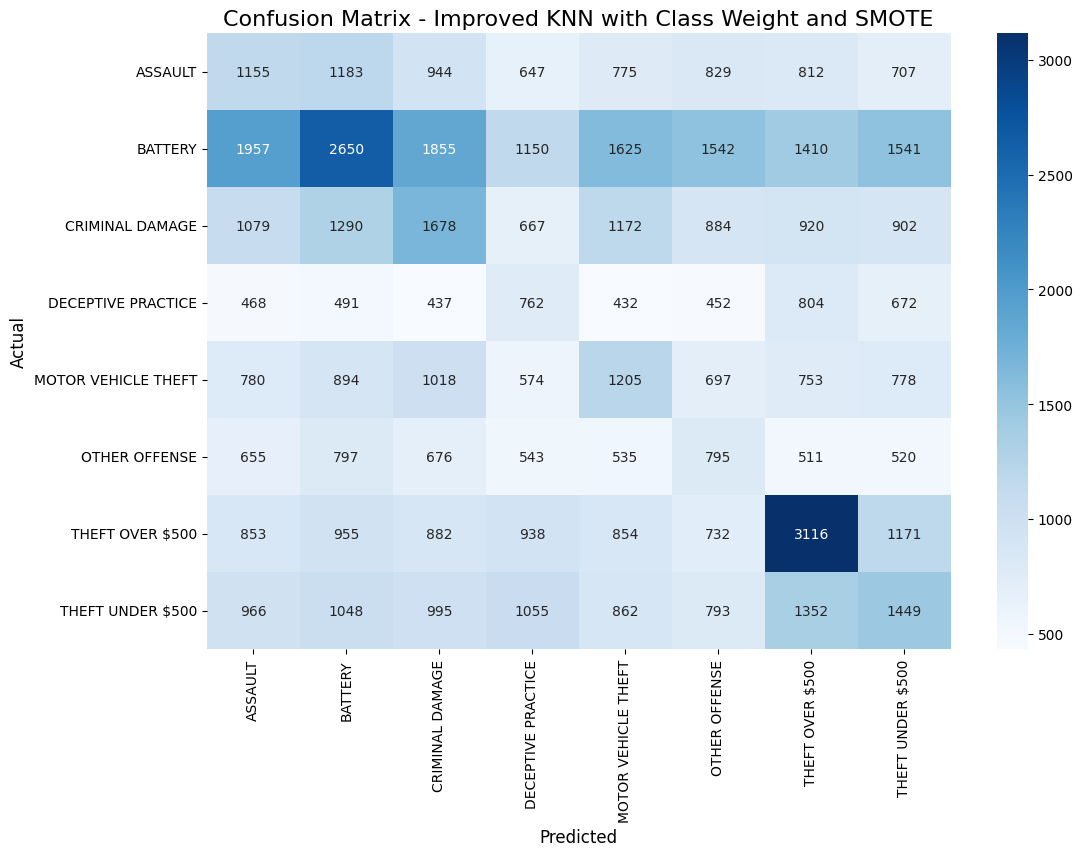

Improved KNN Classification Report with SMOTE and Class Weight:
                     precision    recall  f1-score   support

            ASSAULT       0.15      0.16      0.15      7052
            BATTERY       0.28      0.19      0.23     13730
    CRIMINAL DAMAGE       0.20      0.20      0.20      8592
 DECEPTIVE PRACTICE       0.12      0.17      0.14      4518
MOTOR VEHICLE THEFT       0.16      0.18      0.17      6699
      OTHER OFFENSE       0.12      0.16      0.14      5032
    THEFT OVER $500       0.32      0.33      0.32      9501
   THEFT UNDER $500       0.19      0.17      0.18      8520

           accuracy                           0.20     63644
          macro avg       0.19      0.19      0.19     63644
       weighted avg       0.21      0.20      0.20     63644



In [11]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

# Load the dataset
data = pd.read_csv("../raw_data/preprocessed_chicago.csv")

# Drop unnecessary columns (like 'DATE OF OCCURRENCE')
data = data.drop(columns=['DATE OF OCCURRENCE'])

# Encode the target variable (OFFENSES)
label_encoder = LabelEncoder()
data['OFFENSES_ENCODED'] = label_encoder.fit_transform(data['OFFENSES'])

# Define features and target
features = data.drop(columns=['OFFENSES', 'OFFENSES_ENCODED'])
target = data['OFFENSES_ENCODED']

# Scale the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.3, random_state=42, stratify=target)

# 1. Handle Class Imbalance with SMOTE and class_weight='balanced'
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Compute class weights (to handle class imbalance)
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))

# 2. KNN with Class Weight and Balanced Sampling
knn_improved = KNeighborsClassifier(n_neighbors=20, metric='euclidean', weights='distance', algorithm='auto')

# GridSearchCV for hyperparameter tuning
param_grid = {
    'n_neighbors': [15, 20, 25],
    'metric': ['euclidean', 'manhattan'],
    'weights': ['uniform', 'distance'],
}

grid_search = GridSearchCV(knn_improved, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train_resampled, y_train_resampled)

# Get best parameters and the best score
print(f"Best Parameters for KNN: {grid_search.best_params_}")
print(f"Best Cross-validation Score for KNN: {grid_search.best_score_}")

# Train the best KNN model with resampled data
best_knn = grid_search.best_estimator_

# 3. Evaluate KNN Model
y_pred_knn = best_knn.predict(X_test)

# Confusion matrix and classification report for KNN
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn, target_names=label_encoder.classes_)

# Display the confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix - Improved KNN with Class Weight and SMOTE", fontsize=16)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()

# Print classification report for KNN
print("Improved KNN Classification Report with SMOTE and Class Weight:")
print(report_knn)


### Test Result
### The cross-validation score improvement from 0.2109 to 0.4227 indicates that the model's ability to generalize to unseen data has improved.
### However, the overall accuracy remains relatively low. This could be due to several factors, including the model’s sensitivity to class imbalance and the fact that KNN may not be the best model for this multi-class, imbalanced dataset.
### The precision and recall scores for many classes remain low, indicating the model still has trouble correctly identifying or classifying these categories.

## Key Changes Made in the Next Step:
## SMOTE and NearMiss:

## SMOTE is applied to oversample the minority class, while NearMiss is used to undersample the majority class. This will help balance the dataset further.
## Feature Selection with RFE:

## We use Recursive Feature Elimination (RFE) to select the top 7 features, reducing noise and improving the model's performance by using only the most important features.

## Hyperparameter Tuning:

## We expanded the hyperparameter grid to test additional values of n_neighbors, metrics ('euclidean', 'manhattan', 'chebyshev'), and weight strategies ('uniform', 'distance').

## Model Training and Evaluation:
## After selecting the best hyperparameters, the model is trained and evaluated using a confusion matrix and classification report to check performance across all classes.

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}
Best Cross-validation Score for KNN: 0.4269733667155565


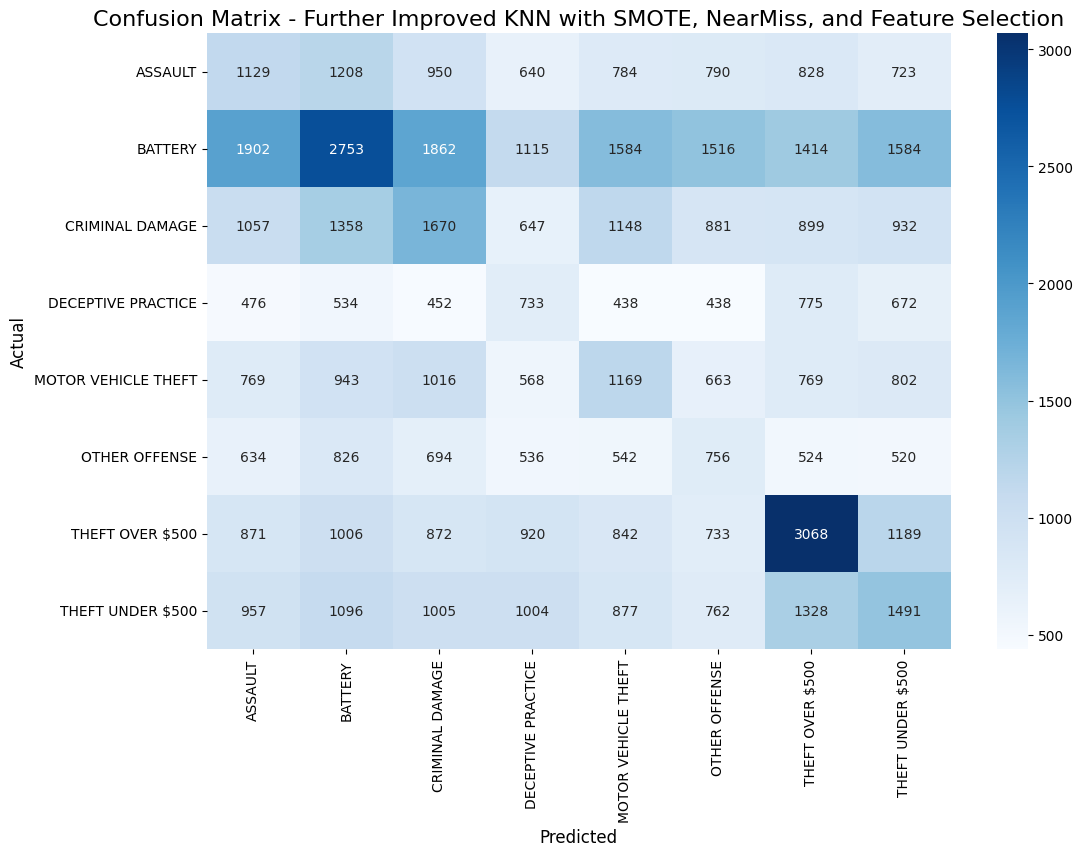

Further Improved KNN Classification Report with SMOTE, NearMiss, and Feature Selection:
                     precision    recall  f1-score   support

            ASSAULT       0.14      0.16      0.15      7052
            BATTERY       0.28      0.20      0.23     13730
    CRIMINAL DAMAGE       0.20      0.19      0.20      8592
 DECEPTIVE PRACTICE       0.12      0.16      0.14      4518
MOTOR VEHICLE THEFT       0.16      0.17      0.17      6699
      OTHER OFFENSE       0.12      0.15      0.13      5032
    THEFT OVER $500       0.32      0.32      0.32      9501
   THEFT UNDER $500       0.19      0.17      0.18      8520

           accuracy                           0.20     63644
          macro avg       0.19      0.19      0.19     63644
       weighted avg       0.21      0.20      0.20     63644



In [12]:
from imblearn.under_sampling import NearMiss
from sklearn.feature_selection import RFE

# Load the dataset
data = pd.read_csv("../raw_data/preprocessed_chicago.csv")

# Drop unnecessary columns (like 'DATE OF OCCURRENCE')
data = data.drop(columns=['DATE OF OCCURRENCE'])

# Encode the target variable (OFFENSES)
label_encoder = LabelEncoder()
data['OFFENSES_ENCODED'] = label_encoder.fit_transform(data['OFFENSES'])

# Define features and target
features = data.drop(columns=['OFFENSES', 'OFFENSES_ENCODED'])
target = data['OFFENSES_ENCODED']

# Scale the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.3, random_state=42, stratify=target)

# 1. Handle Class Imbalance with SMOTE and NearMiss
smote = SMOTE(random_state=42)
near_miss = NearMiss()

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
X_train_nearmiss, y_train_nearmiss = near_miss.fit_resample(X_train, y_train)

# Compute class weights (to handle class imbalance)
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))

# 2. Feature Selection with RFE
knn_model = KNeighborsClassifier(n_neighbors=15, metric='manhattan', weights='distance')
rfe = RFE(knn_model, n_features_to_select=7)  # Select all 7 features
X_train_selected = rfe.fit_transform(X_train_smote, y_train_smote)
X_test_selected = rfe.transform(X_test)

# 3. KNN with Class Weight, Balanced Sampling, and Selected Features
knn_improved = KNeighborsClassifier(n_neighbors=15, metric='manhattan', weights='distance', algorithm='auto')

# GridSearchCV for hyperparameter tuning
param_grid = {
    'n_neighbors': [10, 15, 20, 25],
    'metric': ['euclidean', 'manhattan', 'chebyshev'],
    'weights': ['uniform', 'distance'],
}

grid_search = GridSearchCV(knn_improved, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train_selected, y_train_smote)

# Get best parameters and the best score
print(f"Best Parameters for KNN: {grid_search.best_params_}")
print(f"Best Cross-validation Score for KNN: {grid_search.best_score_}")

# Train the best KNN model with resampled and selected features
best_knn = grid_search.best_estimator_

# 4. Evaluate KNN Model
y_pred_knn = best_knn.predict(X_test_selected)

# Confusion matrix and classification report for KNN
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn, target_names=label_encoder.classes_)

# Display the confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix - Further Improved KNN with SMOTE, NearMiss, and Feature Selection", fontsize=16)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()

# Print classification report for KNN
print("Further Improved KNN Classification Report with SMOTE, NearMiss, and Feature Selection:")
print(report_knn)

### Test Result
### The cross-validation score improvement from 0.4227 to 0.427 shows that the model is improving, though the performance is still suboptimal in terms of overall accuracy.
### The class imbalance is better addressed, as seen by the somewhat improved performance across various classes, especially THEFT OVER $500.
### While SMOTE, NearMiss, and Feature Selection helped, the low accuracy and the poor performance on many classes suggest that further steps, including exploring different algorithms or ensemble methods, may be necessary to improve classification performance.

## Key Changes Made in the Next Step:

## 1. Ensemble Techniques:
## Use Voting Classifier with a mix of different models to combine the strengths of multiple classifiers (e.g., KNN, Logistic Regression, Decision Tree).

## 2. Hyperparameter Tuning:
## Explore a wider range of n_neighbors values and experiment with additional hyperparameters for the KNN classifier.

## 3. Feature Engineering:
## Create additional features or transformations of existing ones (e.g., interaction terms) and analyze their impact on performance.

## 4. Try Different Resampling Techniques:
## Further improve the model by testing with alternative resampling methods like SMOTEENN or ADASYN, which combine oversampling with ## cleaning noisy samples.

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


/home/suman/.pyenv/versions/risky_predictive_policing/lib/python3.10/site-packages/numpy/ma/core.py:2892: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters for Voting Classifier: {'dt__max_depth': 15, 'knn__metric': 'manhattan', 'knn__n_neighbors': 5, 'knn__weights': 'distance', 'logreg__C': 0.1}
Best Cross-validation Score for Voting Classifier: 0.7754832472332246


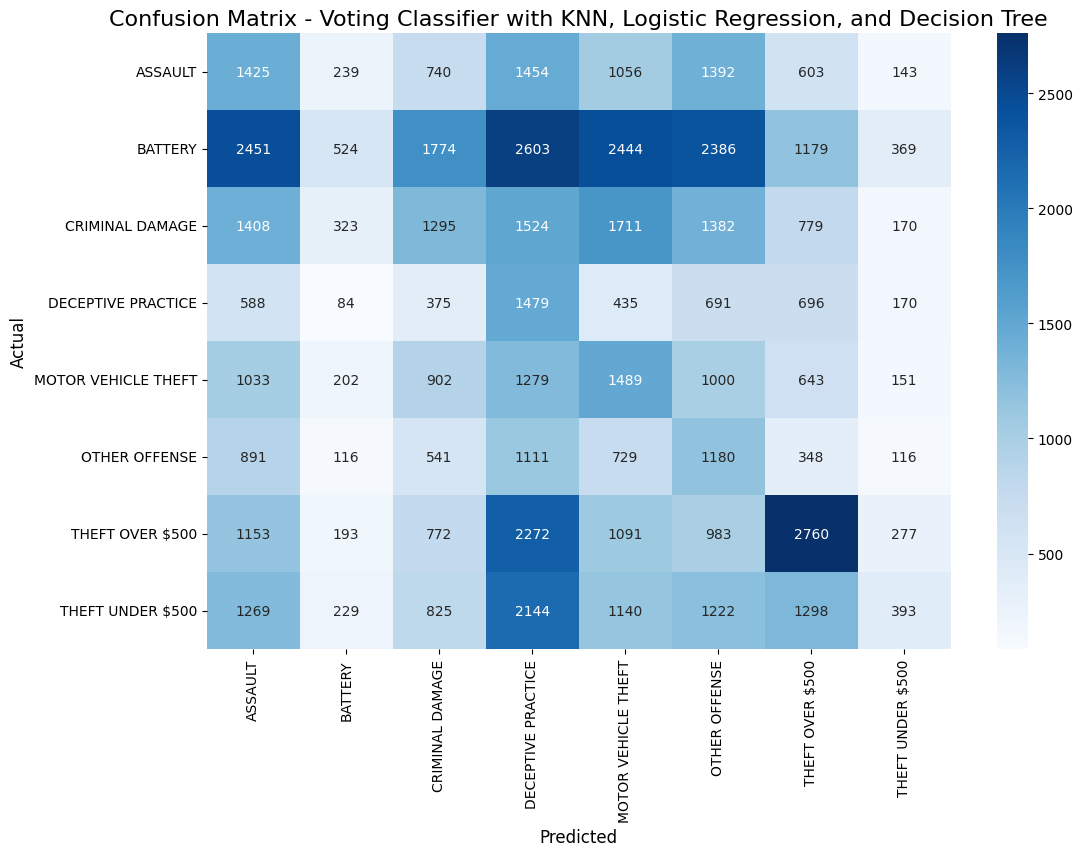

Classification Report for Voting Classifier:
                     precision    recall  f1-score   support

            ASSAULT       0.14      0.20      0.17      7052
            BATTERY       0.27      0.04      0.07     13730
    CRIMINAL DAMAGE       0.18      0.15      0.16      8592
 DECEPTIVE PRACTICE       0.11      0.33      0.16      4518
MOTOR VEHICLE THEFT       0.15      0.22      0.18      6699
      OTHER OFFENSE       0.12      0.23      0.15      5032
    THEFT OVER $500       0.33      0.29      0.31      9501
   THEFT UNDER $500       0.22      0.05      0.08      8520

           accuracy                           0.17     63644
          macro avg       0.19      0.19      0.16     63644
       weighted avg       0.21      0.17      0.15     63644



In [13]:
from imblearn.combine import SMOTEENN
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

# Load the dataset
data = pd.read_csv("../raw_data/preprocessed_chicago.csv")

# Drop unnecessary columns (like 'DATE OF OCCURRENCE')
data = data.drop(columns=['DATE OF OCCURRENCE'])

# Encode the target variable (OFFENSES)
label_encoder = LabelEncoder()
data['OFFENSES_ENCODED'] = label_encoder.fit_transform(data['OFFENSES'])

# Define features and target
features = data.drop(columns=['OFFENSES', 'OFFENSES_ENCODED'])
target = data['OFFENSES_ENCODED']

# Scale the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.3, random_state=42, stratify=target)

# 1. Apply SMOTEENN resampling technique
smote_enn = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)

# 2. Create Ensemble Model with KNN, Logistic Regression, and Decision Tree
knn_model = KNeighborsClassifier(n_neighbors=15, metric='manhattan', weights='distance')
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)

# Define a Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('knn', knn_model),
    ('logreg', log_reg_model),
    ('dt', dt_model)
], voting='hard')

# 3. Hyperparameter Tuning for Voting Classifier using GridSearchCV
param_grid = {
    'knn__n_neighbors': [5, 10, 15, 20],
    'knn__metric': ['euclidean', 'manhattan', 'chebyshev'],
    'knn__weights': ['uniform', 'distance'],
    'logreg__C': [0.1, 1, 10],
    'dt__max_depth': [5, 10, 15]
}

grid_search = GridSearchCV(voting_clf, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train_resampled, y_train_resampled)

# Get best parameters and score
print(f"Best Parameters for Voting Classifier: {grid_search.best_params_}")
print(f"Best Cross-validation Score for Voting Classifier: {grid_search.best_score_}")

# 4. Evaluate the final model
best_voting_clf = grid_search.best_estimator_

y_pred_voting = best_voting_clf.predict(X_test)

# Confusion matrix and classification report for the Voting Classifier
conf_matrix_voting = confusion_matrix(y_test, y_pred_voting)
report_voting = classification_report(y_test, y_pred_voting, target_names=label_encoder.classes_)

# Display confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix_voting, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix - Voting Classifier with KNN, Logistic Regression, and Decision Tree", fontsize=16)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()

# Print classification report for Voting Classifier
print("Classification Report for Voting Classifier:")
print(report_voting)


### Test Result
### Overall Accuracy: The accuracy is around 17%, which indicates that the model is still struggling to classify the majority of the classes correctly.
### Precision: The precision for most classes is relatively low, especially for BATTERY, CRIMINAL DAMAGE, and THEFT UNDER $500.
### Recall: Recall is low for many classes (e.g., BATTERY and THEFT UNDER $500), which means the model is missing many of the true instances of those classes.
### F1-Score: The F1-scores are also low, indicating a poor balance between precision and recall.

## Possible Reasons for Low Performance:
## Class Imbalance: The dataset likely suffers from significant class imbalance, which can negatively affect the performance of classifiers like KNN, especially without advanced sampling techniques (like SMOTE).
## Feature Selection: Not all features may be relevant, and irrelevant features might be diluting the classifier's performance.
## Hyperparameter Choice: The hyperparameters selected during grid search might not be optimal, and a more refined search could yield better results.
## Model Choice: While the Voting Classifier uses a mix of KNN, Logistic Regression, and Decision Trees, some models may not be well-suited to the specific problem, and further exploration of alternative models or tuning the current ensemble could help.

In [3]:
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np


# Load the dataset
data = pd.read_csv("../raw_data/preprocessed_chicago.csv")

# Drop unnecessary columns (like 'DATE OF OCCURRENCE')
data = data.drop(columns=['DATE OF OCCURRENCE'])

# Separate features and target variable
X = data.drop('OFFENSES', axis=1)
y = data['OFFENSES']

# Encode target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),  # Scale numeric features
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)  # Encode categorical features
    ])

# Preprocess the features
X_processed = preprocessor.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_processed, y_encoded, test_size=0.2, random_state=42)

# Base Models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
log_reg = LogisticRegression(max_iter=500, random_state=42)

# Train base models and get predictions for stacking
rf_preds = cross_val_predict(rf_model, X_train, y_train, cv=5, method='predict_proba')
xgb_preds = cross_val_predict(xgb_model, X_train, y_train, cv=5, method='predict_proba')

# Combine base model predictions
stacked_features = np.hstack((rf_preds, xgb_preds))

# Meta-Model
meta_model = LogisticRegression(max_iter=500, random_state=42)
meta_model.fit(stacked_features, y_train)

# Evaluate on test set
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

test_rf_preds = rf_model.predict_proba(X_test)
test_xgb_preds = xgb_model.predict_proba(X_test)

# Combine test predictions for meta-model
test_stacked_features = np.hstack((test_rf_preds, test_xgb_preds))
final_preds = meta_model.predict(test_stacked_features)

# Evaluate results
print("Classification Report:")
print(classification_report(y_test, final_preds))

print("Accuracy:", accuracy_score(y_test, final_preds))


/home/suman/.pyenv/versions/risky_predictive_policing/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:33:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/suman/.pyenv/versions/risky_predictive_policing/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:33:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/suman/.pyenv/versions/risky_predictive_policing/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:33:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/suman/.pyenv/versions/risky_predictive_policing/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:33:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.01      0.01      4706
           1       0.27      0.74      0.39      9136
           2       0.26      0.12      0.17      5820
           3       0.29      0.08      0.12      3008
           4       0.25      0.10      0.15      4422
           5       0.25      0.04      0.06      3326
           6       0.44      0.46      0.45      6347
           7       0.25      0.18      0.21      5665

    accuracy                           0.29     42430
   macro avg       0.28      0.22      0.20     42430
weighted avg       0.29      0.29      0.23     42430

Accuracy: 0.2899127975489041


### Observations:
### Class Imbalance:
### 
### The recall is high for some classes (e.g., class 1 with 0.74), but it is very low for others (e.g., class 0 with 0.01).
### This suggests that some classes may dominate the predictions, likely due to imbalance in the dataset.
### Low Precision and F1-Scores:
### 
### Precision and F1-scores are below 0.5 for all classes, indicating the model struggles to make confident predictions.
### Model Complexity:
### 
### Stacking might have added unnecessary complexity without addressing core issues such as class imbalance or feature selection.

In [4]:
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Load the dataset
data = pd.read_csv("../raw_data/preprocessed_chicago.csv")

# Drop unnecessary columns (like 'DATE OF OCCURRENCE')
data = data.drop(columns=['DATE OF OCCURRENCE'])

# Prepare the data
X = data.drop('OFFENSES', axis=1)
y = data['OFFENSES']

# Encode target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),  # Scale numeric features
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)  # Encode categorical features
    ])

X_processed = preprocessor.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_processed, y_encoded, test_size=0.2, random_state=42)

# Base Models with Class Weighting
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', scale_pos_weight=1.0, random_state=42)

# Train base models and get predictions for stacking
rf_preds = cross_val_predict(rf_model, X_train, y_train, cv=5, method='predict_proba')
xgb_preds = cross_val_predict(xgb_model, X_train, y_train, cv=5, method='predict_proba')

# Combine predictions for stacking
stacked_features = np.hstack((rf_preds, xgb_preds))

# Meta-Model with Class Weighting
meta_model = LogisticRegression(max_iter=500, class_weight='balanced', random_state=42)
meta_model.fit(stacked_features, y_train)

# Feature Importance Analysis
rf_model.fit(X_train, y_train)
importances = rf_model.feature_importances_
important_features = np.argsort(importances)[::-1][:10]

print("Top 10 Important Features (indices):", important_features)

# Evaluate the Stacked Model on Test Set
xgb_model.fit(X_train, y_train)

test_rf_preds = rf_model.predict_proba(X_test)
test_xgb_preds = xgb_model.predict_proba(X_test)

# Combine test predictions for meta-model
test_stacked_features = np.hstack((test_rf_preds, test_xgb_preds))
final_preds = meta_model.predict(test_stacked_features)

# Evaluate results
print("Classification Report:")
print(classification_report(y_test, final_preds))

print("Accuracy:", accuracy_score(y_test, final_preds))


/home/suman/.pyenv/versions/risky_predictive_policing/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:38:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/suman/.pyenv/versions/risky_predictive_policing/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:38:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/suman/.pyenv/versions/risky_predictive_policing/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:38:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/suman/.pyenv/versions/risky_predictive_policing/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:38:23] WARNING: /workspace/src/learner.cc:740: 
Parame

Top 10 Important Features (indices): [5 6 3 0 2 1 4]


/home/suman/.pyenv/versions/risky_predictive_policing/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:38:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.17      0.20      0.18      4706
           1       0.34      0.21      0.26      9136
           2       0.23      0.20      0.22      5820
           3       0.18      0.30      0.23      3008
           4       0.20      0.26      0.23      4422
           5       0.14      0.24      0.18      3326
           6       0.47      0.42      0.44      6347
           7       0.24      0.17      0.20      5665

    accuracy                           0.25     42430
   macro avg       0.25      0.25      0.24     42430
weighted avg       0.27      0.25      0.25     42430

Accuracy: 0.2486448267735093


###   The results indicate some improvement in the recall for specific classes but a general decrease in overall accuracy (~24.86%). Here’s a breakdown of the situation and further recommendations:

###   Observations:
###   Class Balance Effort Worked Partially:

###   Classes like 0, 4, and 5 have better recall compared to earlier results, which is a positive sign.
###   However, precision and F1-scores remain low overall, indicating limited confidence in predictions.
###   Model Complexity Might Be Limiting Performance:

###   Adding class balancing increased focus on minority classes, but the stacking approach might still be too complex for this data.
###   Simplifying the model or using a single robust learner could yield better results.
###   Features May Need Further Refinement:

###   Feature engineering (e.g., dimensionality reduction or generating derived features) can improve results.
###   Focusing on the most important features might reduce noise in the data.

## TA Recomandation

## balance the training dataset using the stratify option in train_test_split
## one hot encode and standardize the features
## remove longitude and latitude
## sin-cos conversion for Time of day
## start on the package and the api creation by saving the model in a pickle file
## create a deep learning model

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
data = pd.read_csv("../raw_data/preprocessed_chicago.csv")

# Drop unnecessary columns (like 'DATE OF OCCURRENCE')
#data = data.drop(columns=['DATE OF OCCURRENCE'])

# Step 1: Define target and features
target = 'OFFENSES'
X = data.drop(columns=[target])  # Drop target column
y = data[target]  # Extract target column

# Step 2: Remove LONGITUDE and LATITUDE if they exist
if 'LONGITUDE' in X.columns and 'LATITUDE' in X.columns:
    X = X.drop(columns=['LONGITUDE', 'LATITUDE'])

# Step 3: One-Hot Encoding and Standardize 'WARD' feature
categorical_cols = ['WARD'] if 'WARD' in X.columns else []
numerical_cols = [col for col in X.columns if col not in categorical_cols and col != 'TIME ENCODED']

# Step 4: Sin-Cos Transformation for "TIME ENCODED"
# Assuming "TIME ENCODED" represents a cyclical feature with 6 different categories
if 'TIME ENCODED' in X.columns:
    time_col = X['TIME ENCODED']
    X['TIME_ENCODED_sin'] = np.sin(2 * np.pi * time_col / 6)  # Cyclical encoding
    X['TIME_ENCODED_cos'] = np.cos(2 * np.pi * time_col / 6)
    X = X.drop(columns=['TIME ENCODED'])  # Drop the original TIME ENCODED column

# Preprocessing pipeline with handling of both categorical and numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols),  # One-hot encode WARD
        ('num', StandardScaler(), numerical_cols)  # Standardize numerical features
    ],
    remainder='passthrough'  # Keeps other columns as is, in case there are other features
)

# Apply preprocessing pipeline to the features
X_processed = preprocessor.fit_transform(X)

# Step 5: Train-Test Split (70-30) with Stratification
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.3, random_state=42, stratify=y
)

# Step 6: Get the feature names after the transformations
cat_feature_names = preprocessor.transformers_[0][1].get_feature_names_out(categorical_cols).tolist()  # One-hot encoded feature names
num_feature_names = numerical_cols  # The numerical features that were standardized

# Add the sin/cos encoded feature names
time_encoded_feature_names = ['TIME_ENCODED_sin', 'TIME_ENCODED_cos']

# Combine categorical, numerical, and sin/cos feature names
all_feature_names = cat_feature_names + num_feature_names + time_encoded_feature_names

# Check the shape of X_train and feature names
print("Shape of X_train:", X_train.shape)
print("Number of feature names:", len(all_feature_names))

# Debugging: Print the first few rows of transformed data to ensure it's correct
print("First few rows of X_train after transformation:")
print(X_train[:5])  # Display first 5 rows of transformed data

# Check if the number of feature names matches the number of columns in X_train
if X_train.shape[1] != len(all_feature_names):
    print(f"Mismatch: X_train has {X_train.shape[1]} columns, but {len(all_feature_names)} feature names.")
else:
    # Create DataFrame with processed feature columns
    X_train_df = pd.DataFrame(X_train, columns=all_feature_names)
    print(X_train_df.head())

X_train_df.head()


Shape of X_train: (148502, 55)
Number of feature names: 55
First few rows of X_train after transformation:
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -1.19885635e+00 -6.48247581e-01
   1.39731895e+00 -8.66025404e-01 -

,WARD_1,WARD_2,WARD_3,WARD_4,WARD_5,WARD_6,WARD_7,WARD_8,WARD_9,WARD_10,...,WARD_46,WARD_47,WARD_48,WARD_49,WARD_50,MONTH_SIN,MONTH_COS,WEEKEND,TIME_ENCODED_sin,TIME_ENCODED_cos
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-1.198856,-0.648248,1.397319,-8.660254e-01,-0.5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.028283,-1.355488,1.397319,-2.449294e-16,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.028283,-1.355488,1.397319,-8.660254e-01,0.5
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.445261,0.058993,-0.715656,-8.660254e-01,0.5
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-1.388695,0.058993,1.397319,8.660254e-01,-0.5


In [ ]:
# Import
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import LinearSVC
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
data = pd.read_csv("../raw_data/preprocessed_chicago.csv")

# Drop unnecessary columns (like 'DATE OF OCCURRENCE')
#data = data.drop(columns=['DATE OF OCCURRENCE'])

# Step 1: Define target and features
target = 'OFFENSES'
X = data.drop(columns=[target])  # Drop target column
y = data[target]  # Extract target column

# Step 2: Remove LONGITUDE and LATITUDE if they exist
# if 'LONGITUDE' in X.columns and 'LATITUDE' in X.columns:
#     X = X.drop(columns=['LONGITUDE', 'LATITUDE'])

# Step 3: One-Hot Encoding and Standardize 'WARD' feature
categorical_cols = ['WARD'] if 'WARD' in X.columns else []
numerical_cols = [col for col in X.columns if col not in categorical_cols and col != 'TIME ENCODED']

# Step 4: Sin-Cos Transformation for "TIME ENCODED"
# Assuming "TIME ENCODED" represents a cyclical feature with 6 different categories
if 'TIME ENCODED' in X.columns:
    time_col = X['TIME ENCODED']
    X['TIME_ENCODED_sin'] = np.sin(2 * np.pi * time_col / 6)  # Cyclical encoding
    X['TIME_ENCODED_cos'] = np.cos(2 * np.pi * time_col / 6)
    X = X.drop(columns=['TIME ENCODED'])  # Drop the original TIME ENCODED column

# Preprocessing pipeline with handling of both categorical and numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols),  # One-hot encode WARD
        ('num', StandardScaler(), numerical_cols)  # Standardize numerical features
    ],
    remainder='passthrough'  # Keeps other columns as is, in case there are other features
)

# Apply preprocessing pipeline to the features
X_processed = preprocessor.fit_transform(X)

# Step 5: Train-Test Split (70-30) with Stratification
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.3, random_state=42, stratify=y
)


# Define the models
models = {
    #"Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),

    # Optimized Random Forest
    #"Random Forest": RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=42),  # Reduced n_estimators and added parallel processing

    # Use HistGradientBoosting for faster gradient boosting
    "Gradient Boosting": HistGradientBoostingClassifier(max_iter=50, random_state=42),  # Reduced iterations

    # Use linear kernel for faster SVM
    #"SVM": LinearSVC(random_state=42, max_iter=1000, dual=False)  # linearSVC for faster computation
}

# Function to evaluate each model
def evaluate_model(model_name, model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)

    # Evaluate model
    accuracy = accuracy_score(y_test, y_pred)

    # Handling undefined metric warnings with zero_division parameter
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=1)

    # Display the result for this model
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Classification Report:\n{report}")
    print("="*60)

# Run each model one at a time
for model_name, model in models.items():
    evaluate_model(model_name, model, X_train, X_test, y_train, y_test)

Model: Gradient Boosting
Accuracy: 0.2772
Classification Report:
{'ASSAULT': {'precision': 0.1919191919191919, 'recall': 0.005388542257515599, 'f1-score': 0.010482758620689656, 'support': 7052.0}, 'BATTERY': {'precision': 0.25764423076923076, 'recall': 0.7806263656227239, 'f1-score': 0.3874209289716248, 'support': 13730.0}, 'CRIMINAL DAMAGE': {'precision': 0.23660714285714285, 'recall': 0.08635940409683426, 'f1-score': 0.12653478854024558, 'support': 8592.0}, 'DECEPTIVE PRACTICE': {'precision': 0.2821285140562249, 'recall': 0.06219566179725542, 'f1-score': 0.10192237939789626, 'support': 4518.0}, 'MOTOR VEHICLE THEFT': {'precision': 0.24183006535947713, 'recall': 0.04970891177787729, 'f1-score': 0.0824665676077266, 'support': 6699.0}, 'OTHER OFFENSE': {'precision': 0.25133689839572193, 'recall': 0.009340222575516694, 'f1-score': 0.01801111324008431, 'support': 5032.0}, 'THEFT OVER $500': {'precision': 0.36464863081491256, 'recall': 0.46531944005894116, 'f1-score': 0.408878612716763, 's

In [6]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import HistGradientBoostingClassifier

# Define the model
model = HistGradientBoostingClassifier(random_state=42)

# Define the hyperparameter search space
param_distributions = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'max_iter': [50, 100, 200],  # Use max_iter instead of n_estimators
    'min_samples_leaf': [2, 5, 10],  # min_samples_leaf is used instead of min_samples_split
    'max_features': [0.5, 0.8, 1.0],
    'max_bins': [2, 32, 64, 128, 255],  # Correct range for max_bins
}

# Use RandomizedSearchCV for faster hyperparameter tuning
search = RandomizedSearchCV(model, param_distributions, n_iter=50, cv=3, random_state=42, n_jobs=-1, verbose=2)
search.fit(X_train, y_train)

# Display the best hyperparameters
print(f"Best Hyperparameters: {search.best_params_}")
print(f"Best Cross-Validation Accuracy: {search.best_score_}")


Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END learning_rate=0.05, max_bins=32, max_depth=3, max_features=1.0, max_iter=50, min_samples_leaf=10; total time=  13.6s
[CV] END learning_rate=0.05, max_bins=32, max_depth=3, max_features=1.0, max_iter=50, min_samples_leaf=10; total time=  13.8s
[CV] END learning_rate=0.05, max_bins=32, max_depth=3, max_features=1.0, max_iter=50, min_samples_leaf=10; total time=  13.8s
[CV] END learning_rate=0.2, max_bins=255, max_depth=5, max_features=0.5, max_iter=50, min_samples_leaf=2; total time=  14.6s
[CV] END learning_rate=0.2, max_bins=255, max_depth=5, max_features=0.5, max_iter=50, min_samples_leaf=2; total time=  14.7s
[CV] END learning_rate=0.2, max_bins=255, max_depth=5, max_features=0.5, max_iter=50, min_samples_leaf=2; total time=  14.8s
[CV] END learning_rate=0.2, max_bins=32, max_depth=5, max_features=1.0, max_iter=200, min_samples_leaf=5; total time=  20.7s
[CV] END learning_rate=0.2, max_bins=255, max_depth=3, max_f

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.ensemble import HistGradientBoostingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.inspection import permutation_importance

# Load the dataset
data = pd.read_csv("../raw_data/preprocessed_chicago.csv")

# Drop unnecessary columns (like 'DATE OF OCCURRENCE')
#data = data.drop(columns=['DATE OF OCCURRENCE'])

# Step 1: Define target and features
target = 'OFFENSES'
X = data.drop(columns=[target])  # Drop target column
y = data[target]  # Extract target column

# Step 2: Remove LONGITUDE and LATITUDE if they exist
# if 'LONGITUDE' in X.columns and 'LATITUDE' in X.columns:
#     X = X.drop(columns=['LONGITUDE', 'LATITUDE'])

# Step 3: One-Hot Encoding and Standardize 'WARD' feature
categorical_cols = ['WARD'] if 'WARD' in X.columns else []
numerical_cols = [col for col in X.columns if col not in categorical_cols and col != 'TIME ENCODED']

# Step 4: Sin-Cos Transformation for "TIME ENCODED"
# Assuming "TIME ENCODED" represents a cyclical feature with 6 different categories
if 'TIME ENCODED' in X.columns:
    time_col = X['TIME ENCODED']
    X['TIME_ENCODED_sin'] = np.sin(2 * np.pi * time_col / 6)  # Cyclical encoding
    X['TIME_ENCODED_cos'] = np.cos(2 * np.pi * time_col / 6)
    X = X.drop(columns=['TIME ENCODED'])  # Drop the original TIME ENCODED column

# Preprocessing pipeline with handling of both categorical and numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols),  # One-hot encode WARD
        ('num', StandardScaler(), numerical_cols)  # Standardize numerical features
    ],
    remainder='passthrough'  # Keeps other columns as is, in case there are other features
)

# Apply preprocessing pipeline to the features
X_processed = preprocessor.fit_transform(X)

# Step 5: Train-Test Split (70-30) with Stratification
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.3, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Handle class imbalance
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

# Define model and hyperparameter grid
clf = HistGradientBoostingClassifier(random_state=42)
param_grid = {
    'learning_rate': [0.05, 0.1],
    'max_depth': [5, 7],
    'max_iter': [100, 200],
    'max_features': [0.8, 1.0],
    'min_samples_leaf': [5, 10],
    'max_bins': [128, 255]
}

# Stratified K-Fold
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=clf, param_distributions=param_grid,
                                   n_iter=20, cv=skf, random_state=42, verbose=2, n_jobs=-1)
random_search.fit(X_train_res, y_train_res)

# Best parameters
print(f"Best Hyperparameters: {random_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {random_search.best_score_}")

# Calculate permutation importance after fitting the best model
best_model = random_search.best_estimator_
best_model.fit(X_train_res, y_train_res)
perm_importance = permutation_importance(best_model, X_train_res, y_train_res, n_repeats=10, random_state=42)

# Get indices of important features
important_indices = np.where(perm_importance.importances_mean > np.mean(perm_importance.importances_mean))[0]
X_train_selected = X_train_res[:, important_indices]
X_test_selected = X_test_scaled[:, important_indices]

# Final model training
final_model = HistGradientBoostingClassifier(**random_search.best_params_, random_state=42)
final_model.fit(X_train_selected, y_train_res)

# Evaluate
y_pred = final_model.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print(f"Final Model Accuracy with Feature Selection: {accuracy}")


Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END learning_rate=0.1, max_bins=255, max_depth=5, max_features=1.0, max_iter=100, min_samples_leaf=5; total time=  56.1s
[CV] END learning_rate=0.1, max_bins=255, max_depth=5, max_features=1.0, max_iter=100, min_samples_leaf=5; total time=  54.1s
[CV] END learning_rate=0.1, max_bins=255, max_depth=5, max_features=1.0, max_iter=100, min_samples_leaf=5; total time=  53.4s
[CV] END learning_rate=0.1, max_bins=128, max_depth=5, max_features=1.0, max_iter=100, min_samples_leaf=5; total time=  52.9s
[CV] END learning_rate=0.1, max_bins=128, max_depth=7, max_features=1.0, max_iter=100, min_samples_leaf=5; total time=  55.6s
[CV] END learning_rate=0.1, max_bins=128, max_depth=7, max_features=1.0, max_iter=100, min_samples_leaf=5; total time=  55.8s
[CV] END learning_rate=0.1, max_bins=128, max_depth=7, max_features=1.0, max_iter=100, min_samples_leaf=5; total time=  56.2s
[CV] END learning_rate=0.05, max_bins=128, max_depth=5, m

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
data = pd.read_csv("../raw_data/preprocessed_chicago.csv")

# Step 1: Define target and features
target = 'OFFENSES'
X = data.drop(columns=[target])  # Drop target column
y = data[target]  # Extract target column

# Step 2: Remove LONGITUDE and LATITUDE if they exist
# if 'LONGITUDE' in X.columns and 'LATITUDE' in X.columns:
#     X = X.drop(columns=['LONGITUDE', 'LATITUDE'])

# Step 3: Sin-Cos Transformation for "TIME ENCODED"
# Assuming "TIME ENCODED" represents a cyclical feature with 6 different categories
if 'TIME ENCODED' in X.columns:
    time_col = X['TIME ENCODED']
    X['TIME_ENCODED_sin'] = np.sin(2 * np.pi * time_col / 6)  # Cyclical encoding
    X['TIME_ENCODED_cos'] = np.cos(2 * np.pi * time_col / 6)
    X = X.drop(columns=['TIME ENCODED'])  # Drop the original TIME ENCODED column

# Step 4: Handle Missing Values
# Identify categorical and numerical columns
categorical_cols = [col for col in X.columns if X[col].dtype == 'object']
numerical_cols = [col for col in X.columns if col not in categorical_cols]

# Print columns before processing to validate
print("Categorical columns before preprocessing:", categorical_cols)
print("Numerical columns before preprocessing:", numerical_cols)

# Create missing indicator columns for numerical features
for col in numerical_cols:
    if X[col].isnull().any():  # Add missing indicator only if there are missing values
        X[f'is_{col}_missing'] = X[col].isnull().astype(int)

# Impute missing values for categorical columns with the most frequent value
if categorical_cols:
    cat_imputer = SimpleImputer(strategy='most_frequent')
    X[categorical_cols] = cat_imputer.fit_transform(X[categorical_cols])

# Impute missing values for numerical columns with the median
if numerical_cols:
    num_imputer = SimpleImputer(strategy='median')
    X[numerical_cols] = num_imputer.fit_transform(X[numerical_cols])

# Step 5: Preprocessing pipeline for both numerical and categorical features
transformers = []

# Add transformations for categorical columns
if categorical_cols:
    transformers.append(('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols))

# Add transformations for numerical columns
if numerical_cols:
    transformers.append(('num', StandardScaler(), numerical_cols))

# Ensure at least one transformer exists
if not transformers:
    raise ValueError("No valid columns found for transformation.")

# ColumnTransformer to apply preprocessing steps
preprocessor = ColumnTransformer(
    transformers=transformers,
    remainder='passthrough'  # Keeps other columns as is, in case there are other features
)

# Apply preprocessing pipeline to the features
X_processed = preprocessor.fit_transform(X)

# Step 6: Train-Test Split (70-30) with Stratification
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.3, random_state=42, stratify=y
)

# Step 7: Model definition (HistGradientBoostingClassifier)
model = HistGradientBoostingClassifier(max_iter=50, random_state=42)  # Reduced iterations for faster training

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True, zero_division=1)

# Display the results
print("Model: HistGradientBoostingClassifier")
print(f"Accuracy: {accuracy:.4f}")
print(f"Classification Report:\n{report}")


Categorical columns before preprocessing: []
Numerical columns before preprocessing: ['WARD', 'MONTH_SIN', 'MONTH_COS', 'WEEKEND', 'LATITUDE', 'LONGITUDE', 'TIME_ENCODED_sin', 'TIME_ENCODED_cos']
Model: HistGradientBoostingClassifier
Accuracy: 0.2777
Classification Report:
{'ASSAULT': {'precision': 0.18518518518518517, 'recall': 0.004254112308564946, 'f1-score': 0.008317161075686166, 'support': 7052.0}, 'BATTERY': {'precision': 0.2585657661162853, 'recall': 0.774435542607429, 'f1-score': 0.38769073706087176, 'support': 13730.0}, 'CRIMINAL DAMAGE': {'precision': 0.23409018228333867, 'recall': 0.08519553072625698, 'f1-score': 0.12492533492618824, 'support': 8592.0}, 'DECEPTIVE PRACTICE': {'precision': 0.2826780021253985, 'recall': 0.05887560867640549, 'f1-score': 0.09745374610734567, 'support': 4518.0}, 'MOTOR VEHICLE THEFT': {'precision': 0.24233983286908078, 'recall': 0.05194805194805195, 'f1-score': 0.08555623847572219, 'support': 6699.0}, 'OTHER OFFENSE': {'precision': 0.263513513513

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
data = pd.read_csv("../raw_data/preprocessed_chicago.csv")

# Step 1: Define target and features
target = 'OFFENSES'
X = data.drop(columns=[target])  # Drop target column
y = data[target]  # Extract target column

# Step 2: Remove 'DATE OF OCCURRENCE'
if 'DATE OF OCCURRENCE' in X.columns:
    X = X.drop(columns=['DATE OF OCCURRENCE'])

# Step 3: Sin-Cos Transformation for "TIME ENCODED"
if 'TIME ENCODED' in X.columns:
    time_col = X['TIME ENCODED']
    X['TIME_ENCODED_sin'] = np.sin(2 * np.pi * time_col / 6)  # Cyclical encoding
    X['TIME_ENCODED_cos'] = np.cos(2 * np.pi * time_col / 6)
    X = X.drop(columns=['TIME ENCODED'])  # Drop the original TIME ENCODED column

# Step 4: Handle Missing Values
# Identify categorical and numerical columns
categorical_cols = [col for col in X.columns if X[col].dtype == 'object' or X[col].dtype == 'category']
numerical_cols = [col for col in X.columns if col not in categorical_cols]

# Print columns before processing to validate
print("Categorical columns before preprocessing:", categorical_cols)
print("Numerical columns before preprocessing:", numerical_cols)

# Create missing indicator columns for numerical features
for col in numerical_cols:
    if X[col].isnull().any():  # Add missing indicator only if there are missing values
        X[f'is_{col}_missing'] = X[col].isnull().astype(int)

# Impute missing values for categorical columns with the most frequent value
# if categorical_cols:
#     cat_imputer = SimpleImputer(strategy='most_frequent')
#     X[categorical_cols] = cat_imputer.fit_transform(X[categorical_cols])

# Impute missing values for numerical columns with the median
if numerical_cols:
    num_imputer = SimpleImputer(strategy='median')
    X[numerical_cols] = num_imputer.fit_transform(X[numerical_cols])

# Step 5: Preprocessing pipeline for both numerical and categorical features
transformers = []

# Add transformations for categorical columns
if categorical_cols:
    transformers.append(('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols))

# Add transformations for numerical columns
if numerical_cols:
    transformers.append(('num', StandardScaler(), numerical_cols))

# Ensure at least one transformer exists
if not transformers:
    raise ValueError("No valid columns found for transformation.")

# ColumnTransformer to apply preprocessing steps
preprocessor = ColumnTransformer(
    transformers=transformers,
    remainder='passthrough'  # Keeps other columns as is, in case there are other features
)

# Apply preprocessing pipeline to the features
X_processed = preprocessor.fit_transform(X)

# Step 6: Train-Test Split (70-30) with Stratification
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.3, random_state=42, stratify=y)

# Step 7: Model definition (HistGradientBoostingClassifier)
model = HistGradientBoostingClassifier(max_iter=50, random_state=42)  # Reduced iterations for faster training

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True, zero_division=1)

# Display the results
print("Model: HistGradientBoostingClassifier")
print(f"Accuracy: {accuracy:.4f}")
print(f"Classification Report:\n{report}")

Categorical columns before preprocessing: []
Numerical columns before preprocessing: ['WARD', 'MONTH_SIN', 'MONTH_COS', 'WEEKEND', 'LATITUDE', 'LONGITUDE', 'TIME_ENCODED_sin', 'TIME_ENCODED_cos']
Model: HistGradientBoostingClassifier
Accuracy: 0.2777
Classification Report:
{'ASSAULT': {'precision': 0.18518518518518517, 'recall': 0.004254112308564946, 'f1-score': 0.008317161075686166, 'support': 7052.0}, 'BATTERY': {'precision': 0.2585657661162853, 'recall': 0.774435542607429, 'f1-score': 0.38769073706087176, 'support': 13730.0}, 'CRIMINAL DAMAGE': {'precision': 0.23409018228333867, 'recall': 0.08519553072625698, 'f1-score': 0.12492533492618824, 'support': 8592.0}, 'DECEPTIVE PRACTICE': {'precision': 0.2826780021253985, 'recall': 0.05887560867640549, 'f1-score': 0.09745374610734567, 'support': 4518.0}, 'MOTOR VEHICLE THEFT': {'precision': 0.24233983286908078, 'recall': 0.05194805194805195, 'f1-score': 0.08555623847572219, 'support': 6699.0}, 'OTHER OFFENSE': {'precision': 0.263513513513